# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 4</p>
### <p style="text-align: center;">Total points: 55 </p>
## <p style="text-align: center;">Due: Wed, **Nov, 3rd** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 

**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please re download from canvas after submission and make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

**Name: Rohitashwa Chakraborty <br>
EID: rc47878**

**Name: Sahitya Sundar Raj Vijayanagar <br>
EID: sv25849**

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Question 1: Reject option (10 pts)

Consider a binary classification problem with the following loss matrix, where the cost of rejection is a constant. 

$$
   {\begin{array}{ccccc}
   & & \text{Predicted class} & \text{           } &\\
   & & C_1 & C_2 & Reject\\
   \text{True class} & C_1 & 0 & 2 & c  \\
   & C_2 & 4 & 0 & c \\
  \end{array} } 
$$

If $c$ = 1, determine the respective predicted classes that will minimize the expected loss when $P(C_1|x)$ falls in different value intervals. That is, please give the decision rules for $C_1$, $C_2$ and $Reject$.

## Answer:

$$
   {\begin{array}{ccccc}
   & & \text{Predicted class} & \text{           } &\\
   & & C_1 & C_2 & Reject\\
   \text{True class} & C_1 & 0(TP) & 2(FN) & 1  \\
   & C_2 & 4(FP) & 0(TN) & 1 \\
  \end{array} } 
$$

If we consider $P(C_1|x)$ as $f(x)$, then $P(C_2|x)$ is $1-f(x)$.

Cost of assigning to class 1: $0f(x) + 4(1-f(x)) = 4 - 4f(x)$ <br>
Cost of assigning to class 2: $2f(x) + 0(1-f(x)) = 2f(x)$ <br>
Cost of rejecting : $1f(x) + 1(1-f(x)) = f(x) + 1 - f(x) = 1$ <br>

$\textbf{Classify to C1, if}$<br>
$\Rightarrow 4 - 4f(x) < 1$<br>
$\Rightarrow f(x) > 3/4$<br>
<!-- $\Rightarrow x > f^{-1}(3/4)$<br> -->
$\textbf{Reject, otherwise}$<br>


$\textbf{Classify to C2, if}$<br>
$\Rightarrow 2f(x) < 1$<br>
$\Rightarrow f(x) < 1/2$<br>
<!-- $\Rightarrow x < f^{-1}(1/2)$<br> -->
$\textbf{Reject, otherwise}$<br>

<!-- $\textbf{Hence, the decision rules are:}$<br>
$\textrm{If } x > f^{-1}(0.75) \textrm{, classify as C1}$<br>
$\textrm{If } x < f^{-1}(0.5) \textrm{, classify as C2}$<br>
$\textrm{If } f^{-1}(0.5) < x < f^{-1}(0.75) \textrm{Reject}$<br> -->

$\textbf{Hence, the decision rules are:}$<br>
$\textrm{If: } P(C_1|x) > (0.75), \quad\quad\quad \textrm{classify as C1}$<br>
$\textrm{If: } P(C_1|x) < (0.5), \quad\quad\quad \textrm{classify as C2}$<br>
$\textrm{If: } 0.5 < P(C_1|x) < 0.75, \quad \textrm{Reject}$<br>

# Question 2: Logistic Regression (15 pts) 

Logistic regression has been traditionally used to classify data when a **linear decision boundary** is adequate. However, having an idea of what the distribution looks like could help one come up with a smart data transformation trick that could make the optimal decision boundary become (near) linear in the transformed space. In this question, you are given 2-dimensional data, and each data point belongs to either class 0 or class 1. 

a) **(5 pts)** Train a logistic regression classifier using X_train, y_train. Use the trained model to make predictions on X_train, X_test respectively, and then report the accuracies and F1-scores. Sklearn has a very nice [utility](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) that helps compute the precision, recall, accuracy and F1-scores. 

b) **(5 pts)** Plot the X_train data using matplotlib, use different colors to represent different classes. Comment on the pattern of data distributions, and reason why the logistic regression classifier in (a) does not perform very well.  

c) **(5 pts)** Transform the input X_train and X_test data in such a way that a linear decision boundary will be effective. Train a new logistic regression classifier on this transformed X_train data. Use the trained model to make predictions on transformed X_train, transformed X_test respectively, and then report the accuracies and F1-scores. 

**Hint**: Carefully analyze the plot you made in (b), observe the decision boundaries, which should guide you towards the right direction.

## Answer:

In [2]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

x1 = np.random.uniform(low=-7.5, high=7.5, size=300)
x2 = np.random.uniform(low=-7.5, high=7.5, size=300)

y_fn = (0.3*x1**2 + 0.8*x2**2) <10

from matplotlib import pyplot as plt

X_train = np.column_stack([x1, x2])
y_train = y_fn
print("Train: ", X_train.shape)

x1 = np.random.uniform(low=-7.5, high=7.5, size=100)
x2 = np.random.uniform(low=-7.5, high=7.5, size=100)
y_fn = (0.3*x1**2 + 0.8*x2**2) <10

X_test = np.column_stack([x1, x2])
y_test = y_fn
print("Test: ", X_test.shape)

X_train = X_train + np.random.random(size=X_train.shape)/10
X_test = X_test + np.random.random(size=X_test.shape)/10

Train:  (300, 2)
Test:  (100, 2)


In [3]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# import the metrics class
from sklearn import metrics
cnf_matrix_train = metrics.confusion_matrix(y_train, y_pred_train)
cnf_matrix_test = metrics.confusion_matrix(y_test, y_pred_test)

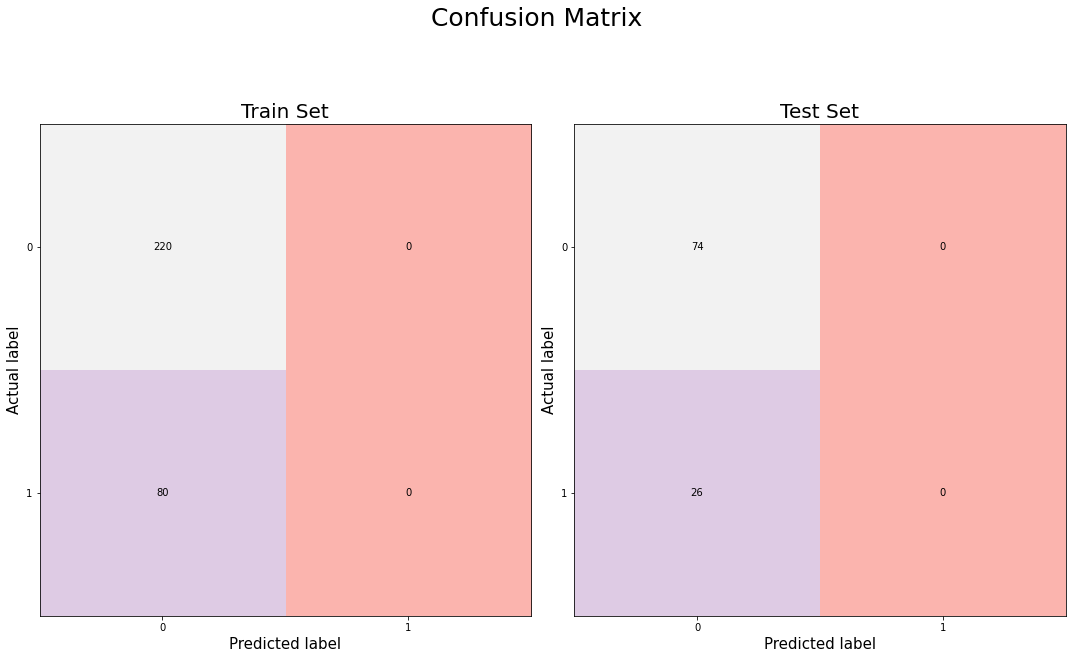

In [4]:
fig, ax = plt.subplots(1,2, sharex= False, sharey=False)
fig.set_size_inches(15, 10,  forward=True)
tick_marks = np.arange(2)
plt.suptitle("Confusion Matrix", size = 25)

ax[0].imshow(cnf_matrix_train, interpolation='nearest', cmap='Pastel1')
ax[0].set_title('Train Set', size = 20)

ax[1].imshow(cnf_matrix_test, interpolation='nearest', cmap='Pastel1')
ax[1].set_title('Test Set', size = 20)

ax[0].set_xticks(tick_marks)
ax[0].set_yticks(tick_marks)

ax[1].set_xticks(tick_marks)
ax[1].set_yticks(tick_marks)

ax[0].set_ylabel('Actual label', size = 15)
ax[0].set_xlabel('Predicted label', size = 15)

ax[1].set_ylabel('Actual label', size = 15)
ax[1].set_xlabel('Predicted label', size = 15)

width, height = cnf_matrix_train.shape
for x in range(width):
    for y in range(height):
        ax[0].annotate(str(cnf_matrix_train[x][y]), xy=(y, x), horizontalalignment='center', verticalalignment='center')
        ax[1].annotate(str(cnf_matrix_test[x][y]), xy=(y, x), horizontalalignment='center', verticalalignment='center')

fig.tight_layout()

In [5]:
from sklearn.metrics import classification_report

print('Classification Report for Train Set:')
print(classification_report(y_train, y_pred_train))

print('\n\nClassification Report for Test Set:')
print(classification_report(y_test, y_pred_test))

Classification Report for Train Set:
              precision    recall  f1-score   support

       False       0.73      1.00      0.85       220
        True       0.00      0.00      0.00        80

    accuracy                           0.73       300
   macro avg       0.37      0.50      0.42       300
weighted avg       0.54      0.73      0.62       300



Classification Report for Test Set:
              precision    recall  f1-score   support

       False       0.74      1.00      0.85        74
        True       0.00      0.00      0.00        26

    accuracy                           0.74       100
   macro avg       0.37      0.50      0.43       100
weighted avg       0.55      0.74      0.63       100



Text(0.5, 1.0, 'Scatter Plot of Training Set')

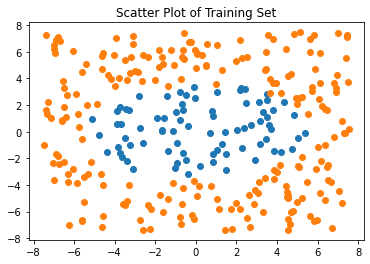

In [6]:
plt.scatter(X_train[y_train][:,0],X_train[y_train][:,1])
plt.scatter(X_train[~y_train][:,0],X_train[~y_train][:,1])
plt.title('Scatter Plot of Training Set')

### INFERENCE:

The scatter plot created above of the datapoints for the two classes gives an idea of the decision boundary that can be created to ensure that the model performs well. As shown, the decision boundary is not linear, and since Logistic Regression performs best on a linear decision boundary between data points, the model built in part a) does not perform well and classifies all data points as Class 0 or False.

### PART C

In order to enable logistic regression to perform better, the data needs to be transformed into a linear boundary. As the original scatter plot shows, the decision boundary is circular/elliptical. Hence, the data points are being transformed into their squares i.e. $x_1^2$ and $x_2^2$. As shown in the scatter plot for the transformed data below, the deicision boundary is mostly linear, this will enable logistic regression to perform better.

Text(0.5, 1.0, 'Scatter plot of transformed data points')

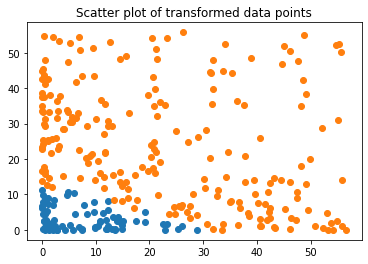

In [7]:
plt.scatter(X_train[y_train][:,0]**2,X_train[y_train][:,1]**2)
plt.scatter(X_train[~y_train][:,0]**2,X_train[~y_train][:,1]**2)
plt.title('Scatter plot of transformed data points')

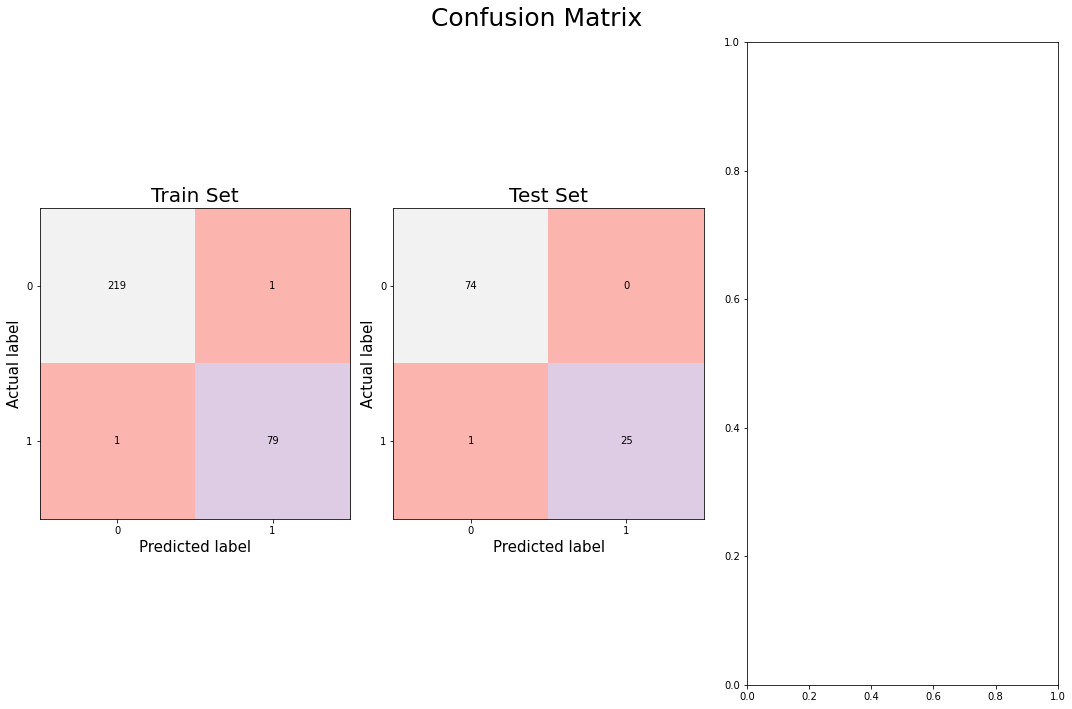

In [22]:
fig, ax = plt.subplots(1,2, sharex= False, sharey=False)
fig.set_size_inches(15, 10,  forward=True)
tick_marks = np.arange(2)
plt.suptitle("Confusion Matrix", size = 25)

ax[0].imshow(cnf_matrix_train, interpolation='nearest', cmap='Pastel1')
ax[0].set_title('Train Set', size = 20)

ax[1].imshow(cnf_matrix_test, interpolation='nearest', cmap='Pastel1')
ax[1].set_title('Test Set', size = 20)

ax[0].set_xticks(tick_marks)
ax[0].set_yticks(tick_marks)

ax[1].set_xticks(tick_marks)
ax[1].set_yticks(tick_marks)

ax[0].set_ylabel('Actual label', size = 15)
ax[0].set_xlabel('Predicted label', size = 15)

ax[1].set_ylabel('Actual label', size = 15)
ax[1].set_xlabel('Predicted label', size = 15)

width, height = cnf_matrix_train.shape
for x in range(width):
    for y in range(height):
        ax[0].annotate(str(cnf_matrix_train[x][y]), xy=(y, x), horizontalalignment='center', verticalalignment='center')
        ax[1].annotate(str(cnf_matrix_test[x][y]), xy=(y, x), horizontalalignment='center', verticalalignment='center')

fig.tight_layout()

In [10]:
from sklearn.metrics import classification_report

print('Classification Report for Train Set:')
print(classification_report(y_train, y_pred_train))

print('\n\nClassification Report for Test Set:')
print(classification_report(y_test, y_pred_test))

Classification Report for Train Set:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       220
        True       0.99      0.99      0.99        80

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



Classification Report for Test Set:
              precision    recall  f1-score   support

       False       0.99      1.00      0.99        74
        True       1.00      0.96      0.98        26

    accuracy                           0.99       100
   macro avg       0.99      0.98      0.99       100
weighted avg       0.99      0.99      0.99       100



# Question 3: Bayesian Network (5 pts)

A Bayesian network is a directed acyclic graph (DAG) that captures a subset of the independence relationships of a given joint probability distribution. 

In a Bayesian network $G=(V,E)$, each node $i \in V$in the directed graph corresponds to a random variable and each directed edge $e \in E$ represents a statistical dependence. Each node is associated with a conditional probability distribution of the corresponding random variables given its parents in the DAG. The joint probability distribution factorizes w.r.t the directed graph $G$ if $p(x_1, ..., x_n)=\prod_{i \in V} p(x_i | x_{parents(i)})$, provided the variables are visited in a topologically sorted order. Please write the joint probability distribution that factorizes w.r.t this graph, in as simple a form as possible (i.e. that results in the smallest possible conditional probability tables:


In [11]:
%%html
<iframe src="https://drive.google.com/file/d/1XigbvsWpNvlols3QarVjDfYf2Dnf3emy/preview" width="640" height="480" allow="autoplay"></iframe>

## Answer:


$$p(A,B,C,D,E,F)= p(A)*p(B|A)*p(C|E,A)*p(D|B)*p(E|B)*p(F|C,D,E)$$

# Question 4: Counterfactuals (25 pts)

To show the effectiveness of a newly proposed model, one needs to compare it with multiple  existing solutions, across multiple datasets with different properties, and typically using multiple evaluation metrics. 

One of the emerging requirements in industry is to be able to explain decisions, and counterfactual (CF) explanations turn out to be a lead contender. Hence a new CF approach also needs to be evaluated comprehensively. See [1] for a review on conterfactual explanations. 

An example of a short comparative testing for CFs is given in [2], (you don’t need to understand the method in [2] since I have not covered this type of techinques in class, just see the result tables). The goal of this question is to **try to obtain results that are similar to those reported in [2]** (note that they give details of their model settings in the appendix). In particular, you will evaluate the following datasets: Breast Cancer, Pima diabetes and Adult Census across 5 metrics (Validity, sparsity, proximity, diversity, in-distributionness). 

**Note**: **Section A** students only need to report on the **Breat Cancer and Adult Census datasets** while **Section B** students only need to report results on the **Pima diabetes and Adult Census datasets**.

[1] Verma, Dickerson, Hines. Counterfactual Explanations for Machine Learning: A Review. [arXiv:2010.10596](https://arxiv.org/abs/2010.10596) (2020) 

[2] Samoilescu, et al. Model-agnostic and Scalable Counterfactual Explanations via Reinforcement Learning.  [arXiv:2106.02597](https://arxiv.org/abs/2106.02597) (2021) 


a) Train **Random Forest, MLP and Logistic Regression** models on your datasets and report the accuracies on each of the datasets, show the accuracy on both the training and test set in a table.

Use the code snippets given below to load the datasets and make the split using the following code snippet: ```X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)``` 

```
# Breast cancer dataset, for Section A only
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target
cols = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension']
X = pd.DataFrame(data=X, columns=cols)

# Pima Diabetes dataset, for Section B only
def load_diabetes():
  df = pd.read_csv('diabetes.csv')
  X = df.drop(['Outcome'], axis=1)
  y = df[['Outcome']]
  return X, np.reshape(y, (-1, ))

X, y = load_diabetes()

# adult census dataset, for Section A and Section B
def load_adult():
  df = pd.read_csv('adult.csv')
  df = pd.get_dummies(df)
  X = df.drop(['target'], axis=1)
  y = df[['target']]
  return X, np.reshape(y, (-1, ))

X, y = load_adult()
```
b) For each of the datasets, plot the calibration curves for the entire dataset. The [module](https://scikit-learn.org/stable/modules/calibration.html) from sklearn should help.

For each dataset, the calibration curve should show a y=x line as the perfect calibration, as well as the calibration curves for each of the model predictions. Mark the plots correctly using a legend.

c) [DiCE](https://github.com/interpretml/DiCE) is an open-source library that is based on the paper [Explaining Machine Learning Classifiers through Diverse Counterfactual Explanations](https://arxiv.org/abs/1905.07697). The codebase has 3 methods in which they generate counterfactuals - random sampling, KD-tree and genetic algorithm. Use DiCE (random) and DiCE (genetic) to generate 5 counterfactuals each for the first 50 data point in the test set for each of the models. Report the following metrics for each of the datasets and each of the models. So essentially, you will need to create a table for each dataset where the metrics are present in the columns and each row represents a different model. 

Here are some pointers that will help you get started with DiCE and the metrics needed. 
- Install the library using ```!pip install dice-ml```
- They have an excellent documentation on their GitHub, and their implementation notebooks will be very helpful. You can check [this](https://github.com/interpretml/DiCE/blob/master/docs/source/notebooks/DiCE_model_agnostic_CFs.ipynb) to get started.
- Section 4.1 in the [DiCE paper](https://arxiv.org/pdf/1905.07697.pdf) discuss and mathematically formulate validity, sparsity, diversity and proximity. Read those carefully and implement functions that can evaluate the metrics. Use the ```Continuous-Proximity``` metric just for simplicity. Use the ```Diversity``` metric and not ```Count-Diversity```.
- For the in-distributionness, use the following code snippet to evaluate the MMD (maximum mean discrepancy) score.

```
def get_mmd_rbf(X, Y, gamma=1.0):
    """MMD using rbf (gaussian) kernel (i.e., k(x,y) = exp(-gamma * ||x-y||^2 / 2))
    Arguments:
        X {[n_sample1, dim]} -- [X matrix]
        Y {[n_sample2, dim]} -- [Y matrix]
    Keyword Arguments:
        gamma {float} -- [kernel parameter] (default: {1.0})
    Returns:
        [scalar] -- [MMD value]
    """
    XX = metrics.pairwise.rbf_kernel(X, X, gamma)
    YY = metrics.pairwise.rbf_kernel(Y, Y, gamma)
    XY = metrics.pairwise.rbf_kernel(X, Y, gamma)
    return XX.mean() + YY.mean() - 2 * XY.mean()
```


## Answer:

## Part a)

### Random Forest Classifier

In [12]:
from sklearn.ensemble import RandomForestClassifier

def random_forest(X_train, X_test, y_train, y_test):
    rfc_model = RandomForestClassifier(max_depth=3, random_state=0)
    rfc_model.fit(X_train, y_train)

    y_pred_test = rfc_model.predict(X_test)
    y_pred_train = rfc_model.predict(X_train)

    rfc_test_acc = round(rfc_model.score(X_test, y_test),3)
    rfc_train_acc = round(rfc_model.score(X_train, y_train),3)

    return rfc_train_acc, rfc_test_acc, rfc_model

### MLP

In [13]:
from sklearn.neural_network import MLPClassifier

def ml_perc(X_train, X_test, y_train, y_test):
    mlp_model = MLPClassifier(random_state=1, max_iter=1000).fit(X_train, y_train)
    y_pred_test = mlp_model.predict(X_test)
    y_pred_train = mlp_model.predict(X_train)

    mlp_test_acc = round(mlp_model.score(X_test, y_test),3)
    mlp_train_acc = round(mlp_model.score(X_train, y_train),3)

    return mlp_train_acc, mlp_test_acc, mlp_model

### Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

def logistic_reg(X_train, X_test, y_train, y_test):
    lr_model = LogisticRegression()
    lr_model.fit(X_train, y_train)
    y_pred_test = lr_model.predict(X_test)
    y_pred_train = lr_model.predict(X_train)

    lr_test_acc = round(lr_model.score(X_test, y_test),3)
    lr_train_acc = round(lr_model.score(X_train, y_train),3)

    return lr_train_acc, lr_test_acc, lr_model

### Accuracy

In [15]:
def accuracy(test_acc, train_acc):
    accuracy_table = pd.DataFrame(columns = ['Train Accuracy','Test Accuracy'], index=['Random Forest Classifier','Multi-layer Perceptron Classifier','Logistic Regression Classfier'])
    accuracy_table['Train Accuracy'] = train_acc
    accuracy_table['Test Accuracy'] = test_acc

    return accuracy_table

### PIMA Diabetes

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Pima Diabetes dataset, for Section B only
def load_diabetes():
    df = pd.read_csv('diabetes.csv')
    X = df.drop(['Outcome'], axis=1)
    y = df[['Outcome']]
    return X, np.reshape(y, (-1, ))

X_pima, y_pima = load_diabetes()

X_train_pima, X_test_pima, y_train_pima, y_test_pima = train_test_split(X_pima, y_pima, test_size=0.33, random_state=42)

rfc_train_acc, rfc_test_acc, rfc_model_pima = random_forest(X_train_pima, X_test_pima, y_train_pima, y_test_pima )
mlp_train_acc, mlp_test_acc, mlp_model_pima = ml_perc(X_train_pima, X_test_pima, y_train_pima, y_test_pima )
lr_train_acc, lr_test_acc, lr_model_pima = logistic_reg(X_train_pima, X_test_pima, y_train_pima, y_test_pima )

test_acc = [rfc_test_acc,mlp_test_acc,lr_test_acc]
train_acc = [rfc_train_acc,mlp_train_acc,lr_train_acc]

accuracy(test_acc, train_acc)

,Train Accuracy,Test Accuracy
Random Forest Classifier,0.809,0.744
Multi-layer Perceptron Classifier,0.768,0.736
Logistic Regression Classfier,0.780,0.748


### Adult Census Diabetes

In [17]:
# adult census dataset, for Section A and Section B
def load_adult():
    df = pd.read_csv('adult.csv')
    df = pd.get_dummies(df)
    X = df.drop(['target'], axis=1)
    y = df[['target']]
    return X, np.reshape(y, (-1, ))

X_adult, y_adult = load_adult()

X_train_adult, X_test_adult, y_train_adult, y_test_adult = train_test_split(X_adult, y_adult, test_size=0.33, random_state=42)

rfc_train_acc, rfc_test_acc, rfc_model_adult = random_forest(X_train_adult, X_test_adult, y_train_adult, y_test_adult)
mlp_train_acc, mlp_test_acc, mlp_model_adult = ml_perc(X_train_adult, X_test_adult, y_train_adult, y_test_adult)
lr_train_acc, lr_test_acc, lr_model_adult = logistic_reg(X_train_adult, X_test_adult, y_train_adult, y_test_adult)

test_acc = [rfc_test_acc,mlp_test_acc,lr_test_acc]
train_acc = [rfc_train_acc,mlp_train_acc,lr_train_acc]

accuracy(test_acc, train_acc)

,Train Accuracy,Test Accuracy
Random Forest Classifier,0.820,0.821
Multi-layer Perceptron Classifier,0.798,0.798
Logistic Regression Classfier,0.787,0.786


## Part b)

### Calibration Plot Function

In [18]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay

def calibration_curve(rfc_model, mlp_model, lr_model, title, X_train, X_test, y_train, y_test):

    clf_list = [
        (rfc_model, "Random Forest"),
        (mlp_model, "Multi Layer Perceptron"),
        (lr_model, "Logistic Regression")]

    fig = plt.figure(figsize=(10, 10))
    gs = GridSpec(4, 2)
    colors = plt.cm.get_cmap("Dark2")

    ax_calibration_curve = fig.add_subplot(gs[:2, :2])
    calibration_displays = {}
    for i, (clf, name) in enumerate(clf_list):
        clf.fit(X_train, y_train)
        display = CalibrationDisplay.from_estimator(
            clf,
            X_test,
            y_test,
            n_bins=10,
            name=name,
            ax=ax_calibration_curve,
            color=colors(i),
        )
        calibration_displays[name] = display

    ax_calibration_curve.grid()
    ax_calibration_curve.set_title("Calibration plots for "+title, fontsize = 16)

    # Add histogram
    grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
    for i, (_, name) in enumerate(clf_list):
        row, col = grid_positions[i]
        ax = fig.add_subplot(gs[row, col])

        ax.hist(
            calibration_displays[name].y_prob,
            range=(0, 1),
            bins=10,
            label=name,
            color=colors(i),
        )
        ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

    plt.tight_layout()
    plt.show()
    
    return

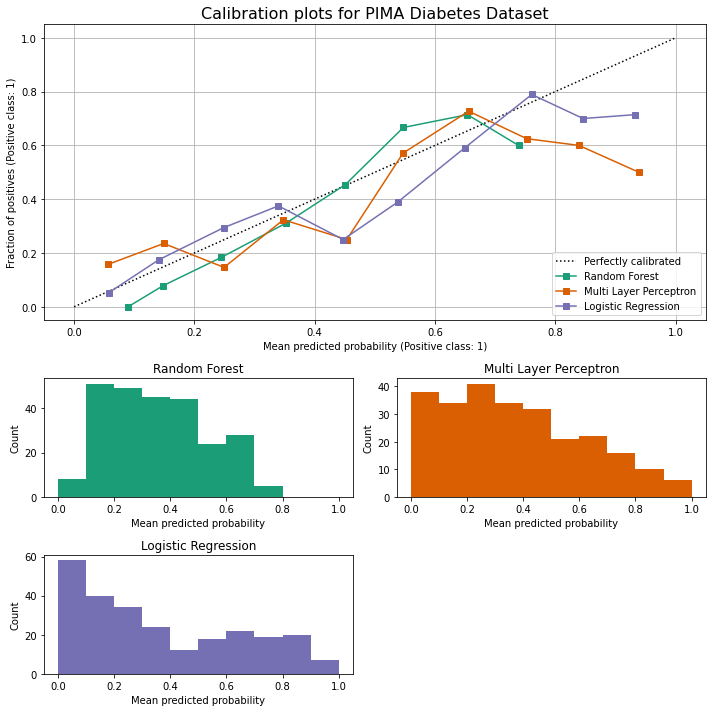

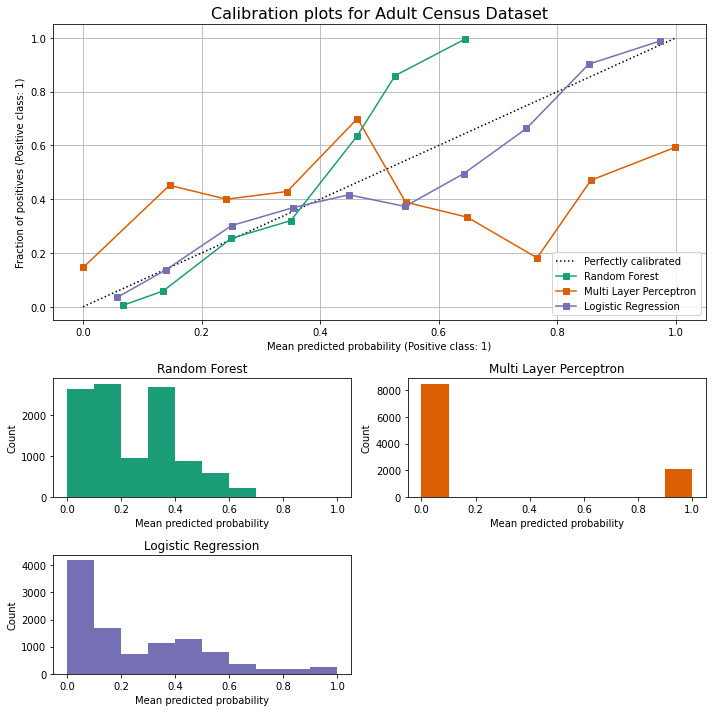

In [19]:
calibration_curve(rfc_model_pima, mlp_model_pima, lr_model_pima, 'PIMA Diabetes Dataset', X_train_pima, X_test_pima, y_train_pima, y_test_pima)
calibration_curve(rfc_model_adult, mlp_model_adult, lr_model_adult, 'Adult Census Dataset', X_train_adult, X_test_adult, y_train_adult, y_test_adult)

## Part c)

In [20]:
# import DiCE
import dice_ml
from dice_ml.utils import helpers  # helper functions

from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

#### Methods

In [83]:
def generateCFs(model, data, continuous, outcome, method, display = False):
    ''' Function to generate counter factuals'''
    backend = 'sklearn'
    dice_model = dice_ml.Model(model=model, backend=backend)
    dice_data = dice_ml.Data(dataframe= data, 
                    continuous_features= continuous, 
                    outcome_name= outcome)

    # initiate DiCE
    dice_exp = dice_ml.Dice(dice_data, dice_model, method= method)

    query_instances = data.drop(outcome, axis = 1)[:15].astype('float').fillna(0)
    
    dice_exp_cf = dice_exp.generate_counterfactuals(query_instances, total_CFs=5, verbose=False)

    if display:
        dice_exp_cf.visualize_as_dataframe(show_only_changes=True)
    return dice_exp_cf

In [89]:
def generateContProximity(cfs, dataset, sample_size, n_cfs, c_features):
    dist_outer = []
    for i in range(sample_size):
        p1 = dataset[c_features].iloc[i].values
        out_array = cfs.cf_examples_list[i].final_cfs_df[c_features].values.T
        temp = np.array([np.abs(c-p1) for c in out_array.T])
        dist = (temp @ temp.T) @ np.ones(n_cfs)
        dist = np.dot(temp, out_array)
        dist_outer.append(-np.mean(np.sqrt(dist)))
    return np.mean(dist_outer)

def generateValidity(cfs, sample_size):
    r_outer = []
    for i in range(sample_size):
        unique_cfs = len(set(map(str, cfs.cf_examples_list[i].final_cfs_df.values)))
        r_outer.append(float(unique_cfs) / sample_size)
    return np.mean(r_outer)

def generateSparcity(cfs, dataset, outcome, sample_size, n_cfs):
    dist_outer = []
    for i in range(sample_size):
        p1 = dataset.drop(outcome, axis = 1).iloc[i].values
        out_array = cfs.cf_examples_list[i].final_cfs_df.values.T
        out_array = out_array[:-1,:]
        temp = sum([sum(np.abs(c-p1)>0) for c in out_array.T])
        temp = float(temp) / n_cfs / dataset.shape[1]
        dist_outer.append(1 - temp)
    return np.mean(dist_outer)


def generateDiversity(cfs, sample_size, n_cfs):
    dist_outer = []
    for i in range(sample_size):
        out_array = cfs.cf_examples_list[i].final_cfs_df.values.T
        dist = 0
        for c in out_array.T:
            temp = np.array([np.abs(q-c) for q in out_array.T])
            dist += sum((temp @ temp.T) @ np.ones(5)) / (c.T @ c)
        dist = float(dist) / n_cfs
        dist_outer.append(dist)
    return np.mean(dist_outer)

def getMmd(cfs, dataset, outcome, sample_size, gamma=1.0):
    XX_list = []
    YY_list = []
    XY_list = []
    for i in range(sample_size):
        X = dataset.drop(outcome, axis = 1).iloc[i].values.reshape(-1, 1).T
        Y = cfs.cf_examples_list[i].final_cfs_df.values
        Y = Y[:,:-1]
        XX = metrics.pairwise.rbf_kernel(X, X, gamma)
        YY = metrics.pairwise.rbf_kernel(Y, Y, gamma)
        XY = metrics.pairwise.rbf_kernel(X, Y, gamma)
        XX_list.append(XX)
        YY_list.append(YY)
        XY_list.append(XY)
    return np.mean(XX_list) + np.mean(YY_list) - 2 * np.mean(XY_list)

## PIMA Diabetes

In [90]:
df_metric = pd.DataFrame(columns=('Dataset','Method','Model','Proximity','Validity','Sparcity','Diversity','MMD'))
methods = ['random','genetic']
model_names = ["Logistic Regression", "Multi Layer Perceptron", "Random Forest Classifier"]

pima_continuous = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
pima_data = pd.concat([X_test_pima, y_test_pima], axis=1).reset_index(drop = True)


for method in methods:
    for index, model in enumerate([lr_model_pima, mlp_model_pima, rfc_model_pima]):
        cfs = generateCFs(model = model, data = pima_data,
                        continuous = pima_continuous, outcome = 'Outcome', method = method)
        
        prox = generateContProximity(cfs, pima_data, 5, 5, pima_continuous)
        valid = generateValidity(cfs, 5)
        sparc = generateSparcity(cfs, pima_data, 'Outcome', 5, 5)
        diverse = generateDiversity(cfs, 5, 5)
        mmd = getMmd(cfs, pima_data, 'Outcome', 5)

        df_metric = df_metric.append(pd.DataFrame([['Diabetes',method,model_names[index],prox,valid,sparc,diverse,mmd]],columns=('Dataset','Method','Model','Proximity','Validity','Sparcity','Diversity','MMD')),ignore_index=True)
df_metric


100%|██████████| 15/15 [00:19<00:00,  1.32s/it]


,Dataset,Method,Model,Proximity,Validity,Sparcity,Diversity,MMD
0,Diabetes,random,Logistic Regression,-59.227402,1.0,0.808889,2.130108,1.170591
1,Diabetes,random,Multi Layer Perceptron,-164.230803,1.0,0.808889,11.639576,1.200000
2,Diabetes,random,Random Forest Classifier,-124.148977,1.0,0.777778,11.194653,1.176758
3,Diabetes,genetic,Logistic Regression,-95.793031,1.0,0.377778,3.150493,1.125886
4,Diabetes,genetic,Multi Layer Perceptron,-79.400859,1.0,0.391111,38.989246,1.120000
5,Diabetes,genetic,Random Forest Classifier,-110.685878,1.0,0.324444,2.836485,1.202165


## Adult Census

In [91]:
# adult_continuous = adult_data.drop('target', axis= 1).columns.to_list()#['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
adult_continuous = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
adult_data = pd.concat([X_test_adult, y_test_adult], axis=1).reset_index(drop = True).astype('float').fillna(0)#[adult_continuous]

for method in methods:
    for index, model in enumerate([lr_model_adult, mlp_model_adult, rfc_model_adult]):
        print(method, model_names[index])
        cfs = generateCFs(model = model, data = adult_data,
                        continuous = adult_continuous, outcome = 'target', method = method)
        
        prox = generateContProximity(cfs, adult_data, 5, 5, adult_continuous)
        valid = generateValidity(cfs, 5)
        sparc = generateSparcity(cfs, adult_data, 'target', 5, 5)
        diverse = generateDiversity(cfs, 5, 5)
        mmd = getMmd(cfs, adult_data, 'target', 5)

        df_metric = df_metric.append(pd.DataFrame([['Census',method,model_names[index],prox,valid,sparc,diverse,mmd]],columns=('Dataset','Method','Model','Proximity','Validity','Sparcity','Diversity','MMD')),ignore_index=True)
df_metric


random Logistic Regression


100%|██████████| 15/15 [00:01<00:00,  8.72it/s]


random Multi Layer Perceptron


100%|██████████| 15/15 [00:01<00:00,  8.55it/s]


random Random Forest Classifier


100%|██████████| 15/15 [00:26<00:00,  1.76s/it]


genetic Logistic Regression


  0%|          | 0/15 [00:00<?, ?it/s]


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

## Results

In [92]:
df_metric

,Dataset,Method,Model,Proximity,Validity,Sparcity,Diversity,MMD
0,Diabetes,random,Logistic Regression,-59.227402,1.0,0.808889,2.130108,1.170591
1,Diabetes,random,Multi Layer Perceptron,-164.230803,1.0,0.808889,11.639576,1.200000
2,Diabetes,random,Random Forest Classifier,-124.148977,1.0,0.777778,11.194653,1.176758
3,Diabetes,genetic,Logistic Regression,-95.793031,1.0,0.377778,3.150493,1.125886
4,Diabetes,genetic,Multi Layer Perceptron,-79.400859,1.0,0.391111,38.989246,1.120000
5,Diabetes,genetic,Random Forest Classifier,-110.685878,1.0,0.324444,2.836485,1.202165
6,Census,random,Logistic Regression,-14593.461960,1.0,0.980896,1.107718,1.196867
7,Census,random,Multi Layer Perceptron,-86381.420186,1.0,0.977910,189.687400,1.157279
8,Census,random,Random Forest Classifier,-54061.903747,1.0,0.910448,2.605730,1.231596


***
***